In [47]:
import numpy as numpy
from scipy import ndimage, fft
import matplotlib
import matplotlib.pyplot as plt
from utils.utils import *

plt.rcParams.update({'figure.dpi': '50'})

2025-09-24 14:32:34.426385: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 14:32:34.437603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758738754.450312   46624 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758738754.455129   46624 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758738754.466965   46624 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Text(0.5, 1.0, 'DCT LaplaceX')

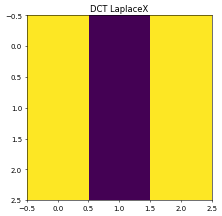

In [48]:
t = np.zeros((3,3))
t[0, 2] =1

dct_basis = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1))
plt.imshow(dct_basis[..., 0,0])
plt.title("DCT LaplaceX")

2025-09-24 14:32:37.854840: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-09-24 14:32:37.854860: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-09-24 14:32:37.854864: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: tech-Alienware-m15-R6
2025-09-24 14:32:37.854867: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: tech-Alienware-m15-R6
2025-09-24 14:32:37.854968: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 535.230.2
2025-09-24 14:32:37.854978: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported

Text(0.5, 1.0, 'AntiSym')

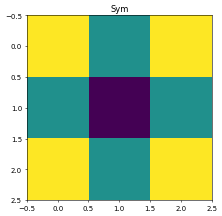

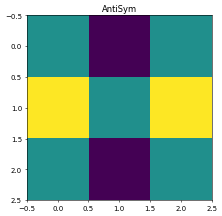

In [49]:
dct_basis_s, dct_basis_a = getSymAntiSymTF(dct_basis)
plt.figure(0)
plt.imshow(dct_basis_s[..., 0,0])
plt.title('Sym')
plt.figure(1)
plt.imshow(dct_basis_a[..., 0,0])
plt.title('AntiSym')


Text(0.5, 1.0, 'dct')

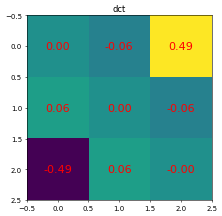

In [50]:
dct_basis_of_anti = fft.idctn(dct_basis_a[..., 0,0].numpy(), norm='ortho')

fig, ax = plt.subplots()
im = ax.imshow(dct_basis_of_anti)
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, f"{dct_basis_of_anti[i, j]:.2f}",
                       ha="center", va="center", color="r", fontsize=16)\
                       
plt.title("dct")

In [51]:
dct_basis_of_anti

array([[ 8.32667268e-17, -5.97865779e-02,  4.92799280e-01],
       [ 5.97865779e-02,  4.16333634e-17, -5.97865779e-02],
       [-4.92799280e-01,  5.97865779e-02, -1.38777878e-17]])

Text(0.5, 1.0, 'DCT LaplaceY')

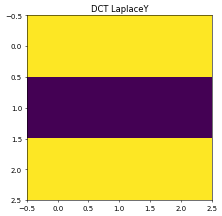

In [52]:
t = np.zeros((3,3))
t[2, 0] =1

dct_basis = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1))
plt.imshow(dct_basis[..., 0,0])
plt.title("DCT LaplaceY")

Text(0.5, 1.0, 'AntiSym')

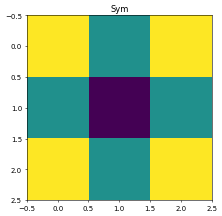

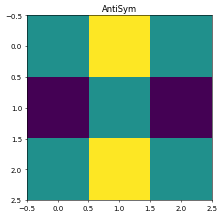

In [53]:
dct_basis_s, dct_basis_a = getSymAntiSymTF(dct_basis)
plt.figure(0)
plt.imshow(dct_basis_s[..., 0,0])
plt.title('Sym')
plt.figure(1)
plt.imshow(dct_basis_a[..., 0,0])
plt.title('AntiSym')

Text(0.5, 1.0, 'AntiSym')

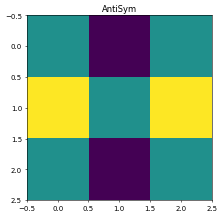

In [54]:
plt.imshow(-dct_basis_a[..., 0,0])
plt.title('AntiSym')

In [55]:
t = np.zeros((3,3))
t[1, 0] =1

a = fft.idctn(t, norm='ortho')
t = np.zeros((3,3))
t[1, 0] =1

b = fft.idctn(t, norm='ortho')

Text(0.5, 1.0, 'AntiSym')

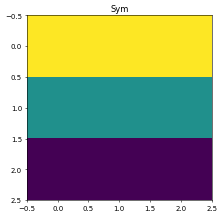

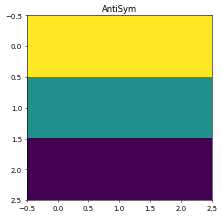

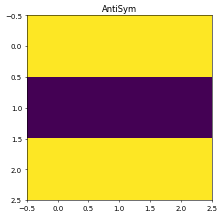

In [56]:
plt.figure(0)
plt.imshow(a)
plt.title('Sym')
plt.figure(1)
plt.imshow(b)
plt.title('AntiSym')
plt.figure(2)
plt.imshow(b*a)
plt.title('AntiSym')

In [57]:
x =  [[(0,0)], [(0,1), (1,0)], [(1,1)], [(2,0), (0,2)], [(1,2), (2,1)], [(2,2)] ]
len(sum(x[-3:], []))

5

/tmp/ipykernel_46624/750157878.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


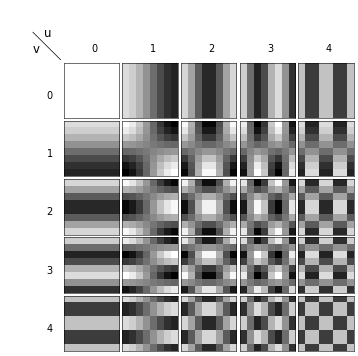

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from scipy.fft import idctn



N = 8
N_disp = 5
eps_const_raw = 1e-12   # constant-patch detection on *raw* IDCT
eps_zero_norm = 1e-6    # near-zero snap on *normalized* values

# 1) Build raw bases
bases_raw = np.zeros((N, N, N, N), dtype=float)  # [v,u,y,x]
is_const = np.zeros((N, N), dtype=bool)
for v in range(N):
    for u in range(N):
        T = np.zeros((N, N), dtype=float)
        T[v, u] = 1.0
        spatial = idctn(T, norm='ortho')
        bases_raw[v, u] = spatial
        # detect const on raw patch
        is_const[v, u] = np.ptp(spatial) < eps_const_raw

# 2) Global normalization to [0,1]
gmin = bases_raw.min()
gmax = bases_raw.max()
rng = gmax - gmin if gmax > gmin else 1.0
bases = (bases_raw - gmin) / rng


# constant -> white, near-zero -> 0
for v in range(N):
    for u in range(N):
        P = bases[v, u]
        if is_const[v, u]:
            P[:] = 1.0
        else:
            P[P < eps_zero_norm] = 0.0
        bases[v, u] = P

# --- figure with labeled headers and u/v wedge ---
fig = plt.figure(figsize=(9, 9))
gs  = fig.add_gridspec(N_disp+1, N_disp+1, wspace=0.05, hspace=0.05)

# corner wedge cell
ax_corner = fig.add_subplot(gs[0, 0])
ax_corner.set_xlim(0, 1); ax_corner.set_ylim(0, 1)
ax_corner.axis("off")

# draw the diagonal wedge boundary
ax_corner.plot([0.5, 1], [0.5, 0], color="black", lw=1)

# draw tiny axes from the corner point (0.12, 0.88)
o = (0.12, 0.88)
# u arrow (to the right)
#ax_corner.add_patch(FancyArrowPatch(o, (0.88, 0.88),
#                                    arrowstyle='-|>', mutation_scale=10, lw=1))
# v arrow (downward)
#ax_corner.add_patch(FancyArrowPatch(o, (0.12, 0.12),
#                                    arrowstyle='-|>', mutation_scale=10, lw=1))

# labels
ax_corner.text(0.7, 0.48, "u", ha="left", va="center", fontsize=17)
ax_corner.text(0.5, 0.2, "v", ha="left", va="center", fontsize=17)

# top header: u = 0..7
for u in range(N_disp):
    axh = fig.add_subplot(gs[0, u+1])
    axh.axis("off")
    axh.text(0.5, 0.2, f"{u}", ha="left", va="center", fontsize=14)

# left header: v = 0..7
for v in range(N_disp):
    axh = fig.add_subplot(gs[v+1, 0])
    axh.axis("off")
    axh.text(0.8, 0.5, f"{v}", ha="center", va="top", fontsize=14)

# tiles
for v in range(N_disp):
    for u in range(N_disp):
        ax = fig.add_subplot(gs[v+1, u+1])
        ax.imshow(bases[v, u], cmap="gray", vmin=0, vmax=1, interpolation="nearest")
        ax.set_aspect("equal")
        ax.set_xticks([]); ax.set_yticks([])
        for s in ax.spines.values():
            s.set_visible(True); s.set_linewidth(0.8)
plt.tight_layout()

plt.show()


False
OOO
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
False
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
True
OOO
OK
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[0.88268343 0.77059805 0.61208538 0.5        0.5        0.61208538
  0.77059805 0.88268343]
 [0.77059805 0

/tmp/ipykernel_46624/2282256008.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


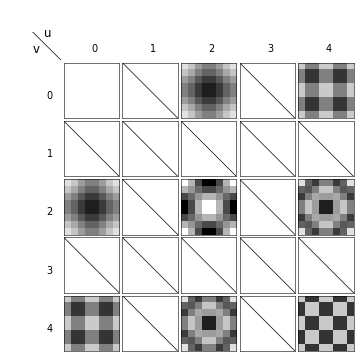

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from scipy.fft import idctn



N = 8
N_disp = 5
eps_const_raw = 1e-7   # constant-patch detection on *raw* IDCT
eps_zero_norm = 1e-6    # near-zero snap on *normalized* values

# 1) Build raw bases
bases_raw = np.zeros((N, N, N, N), dtype=float)  # [v,u,y,x]
is_const = np.zeros((N, N), dtype=int)
for v in range(N):
    for u in range(N):
        T = np.zeros((N, N), dtype=float)
        T[v, u] = 1.0
        spatial = idctn(T, norm='ortho')

        s, a = getSymAntiSymTF(np.reshape(spatial, (N,N,1,1)))
        bases_raw[v, u] = s[:,:,0,0]
        # detect const on raw patch
        print(np.all(bases_raw[v,u]<eps_const_raw))

        if np.ptp(s) < eps_const_raw:
            is_const[v,u] = 1
            print("OOO")
        else:
            is_const[v,u] = 0
        if np.all(bases_raw[v,u] < eps_const_raw):
            is_const[v,u] = -1
            print("OK")




# 2) Global normalization to [0,1]
gmin = bases_raw.min()
gmax = bases_raw.max()
rng = gmax - gmin if gmax > gmin else 1.0
bases = (bases_raw - gmin) / rng

# constant -> white, near-zero -> 0
for v in range(N):
    for u in range(N):
        P = bases[v, u]
        if is_const[v, u]==1:
            P[:] = 1.0
        if  is_const[v, u]==0:
            P[P < eps_zero_norm] = 0.0
        bases[v, u] = P

# --- figure with labeled headers and u/v wedge ---
fig = plt.figure(figsize=(9, 9))
gs  = fig.add_gridspec(N_disp+1, N_disp+1, wspace=0.05, hspace=0.05)

# corner wedge cell
ax_corner = fig.add_subplot(gs[0, 0])
ax_corner.set_xlim(0, 1); ax_corner.set_ylim(0, 1)
ax_corner.axis("off")

# draw the diagonal wedge boundary
ax_corner.plot([0.5, 1], [0.5, 0], color="black", lw=1)

# draw tiny axes from the corner point (0.12, 0.88)
o = (0.12, 0.88)
# u arrow (to the right)
#ax_corner.add_patch(FancyArrowPatch(o, (0.88, 0.88),
#                                    arrowstyle='-|>', mutation_scale=10, lw=1))
# v arrow (downward)
#ax_corner.add_patch(FancyArrowPatch(o, (0.12, 0.12),
#                                    arrowstyle='-|>', mutation_scale=10, lw=1))

# labels
ax_corner.text(0.7, 0.48, "u", ha="left", va="center", fontsize=17)
ax_corner.text(0.5, 0.2, "v", ha="left", va="center", fontsize=17)

# top header: u = 0..7
for u in range(N_disp):
    axh = fig.add_subplot(gs[0, u+1])
    axh.axis("off")
    axh.text(0.5, 0.2, f"{u}", ha="left", va="center", fontsize=14)

# left header: v = 0..7
for v in range(N_disp):
    axh = fig.add_subplot(gs[v+1, 0])
    axh.axis("off")
    axh.text(0.8, 0.5, f"{v}", ha="center", va="top", fontsize=14)

# tiles
for v in range(N_disp):
    for u in range(N_disp):
        ax = fig.add_subplot(gs[v+1, u+1])

        if is_const[v,u] == -1:
            ax.set_xlim(0, 1); ax.set_ylim(0, 1)
            #ax.axis("off")

            # draw the diagonal wedge boundary
            ax.plot([0, 1], [1, 0], color="black", lw=1)
            for spine in ax.spines.values():
                spine.set_visible(True)   # make sure border is drawn

        else:
            print(bases[v,u])
            ax.imshow(bases[v,u], cmap="gray", vmin=0, vmax=1, interpolation="nearest")
        ax.set_aspect("equal")
        ax.set_xticks([]); ax.set_yticks([])
        for s in ax.spines.values():
            s.set_visible(True); s.set_linewidth(0.8)
plt.tight_layout()

plt.show()
fig.savefig(f"dct_sym.png", bbox_inches='tight', dpi=600)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]]
[[0.86047991 0.80560011 0.70419547 0.57170391 0.42829609 0.29580453
  0.19439989 0.13952009]
 [0.86047991 0.80560011 0.70419547 0.57170391 0.42829609 0.29580453
  0.19439989 0.13952009]
 [0.86047991 0.80560011 0.70419547 0.57170391 0.42829609 0.29580453
  0.19439989 0.13952009]
 [0.86047991 0.80560011 0.70419547 0.57170391 0.42829609 0.2

/tmp/ipykernel_46624/4114034150.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


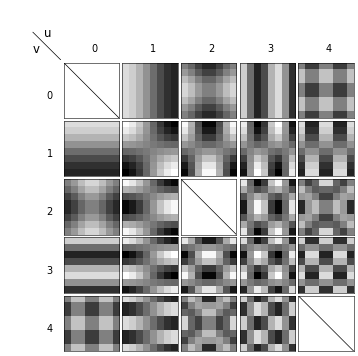

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from scipy.fft import idctn



N = 8
N_disp = 5
eps_const_raw = 1e-7   # constant-patch detection on *raw* IDCT
eps_zero_norm = 1e-6    # near-zero snap on *normalized* values

# 1) Build raw bases
bases_raw = np.zeros((N, N, N, N), dtype=float)  # [v,u,y,x]
is_const = np.zeros((N, N), dtype=int)
for v in range(N):
    for u in range(N):
        T = np.zeros((N, N), dtype=float)
        T[v, u] = 1.0
        spatial = idctn(T, norm='ortho')

        s, a = getSymAntiSymTF(np.reshape(spatial, (N,N,1,1)))
        bases_raw[v, u] = a[:,:,0,0]
        # detect const on raw patch
        print(np.all(bases_raw[v,u]<eps_const_raw))

        if np.ptp(a) < eps_const_raw:
            is_const[v,u] = 1
        else:
            is_const[v,u] = 0
        if np.all(bases_raw[v,u] < eps_const_raw):
            is_const[v,u] = -1




# 2) Global normalization to [0,1]
gmin = bases_raw.min()
gmax = bases_raw.max()
rng = gmax - gmin if gmax > gmin else 1.0
bases = (bases_raw - gmin) / rng

# constant -> white, near-zero -> 0
for v in range(N):
    for u in range(N):
        P = bases[v, u]
        if is_const[v, u]==1:
            P[:] = 1.0
        if  is_const[v, u]==0:
            P[P < eps_zero_norm] = 0.0
        bases[v, u] = P

# --- figure with labeled headers and u/v wedge ---
fig = plt.figure(figsize=(9, 9))
gs  = fig.add_gridspec(N_disp+1, N_disp+1, wspace=0.05, hspace=0.05)

# corner wedge cell
ax_corner = fig.add_subplot(gs[0, 0])
ax_corner.set_xlim(0, 1); ax_corner.set_ylim(0, 1)
ax_corner.axis("off")

# draw the diagonal wedge boundary
ax_corner.plot([0.5, 1], [0.5, 0], color="black", lw=1)

# draw tiny axes from the corner point (0.12, 0.88)
o = (0.12, 0.88)
# u arrow (to the right)
#ax_corner.add_patch(FancyArrowPatch(o, (0.88, 0.88),
#                                    arrowstyle='-|>', mutation_scale=10, lw=1))
# v arrow (downward)
#ax_corner.add_patch(FancyArrowPatch(o, (0.12, 0.12),
#                                    arrowstyle='-|>', mutation_scale=10, lw=1))

# labels
ax_corner.text(0.7, 0.48, "u", ha="left", va="center", fontsize=17)
ax_corner.text(0.5, 0.2, "v", ha="left", va="center", fontsize=17)

# top header: u = 0..7
for u in range(N_disp):
    axh = fig.add_subplot(gs[0, u+1])
    axh.axis("off")
    axh.text(0.5, 0.2, f"{u}", ha="left", va="center", fontsize=14)

# left header: v = 0..7
for v in range(N_disp):
    axh = fig.add_subplot(gs[v+1, 0])
    axh.axis("off")
    axh.text(0.8, 0.5, f"{v}", ha="center", va="top", fontsize=14)

# tiles
for v in range(N_disp):
    for u in range(N_disp):
        ax = fig.add_subplot(gs[v+1, u+1])
        print(bases[v,u])
        if is_const[v,u] == -1:
            ax.set_xlim(0, 1); ax.set_ylim(0, 1)
            #ax.axis("off") 

            

            # draw the diagonal wedge boundary
            ax.plot([0, 1], [1, 0], color="black", lw=1)
            #ax.plot([0,1], [0, 1], color="black", lw=1)

            for spine in ax.spines.values():
                spine.set_visible(True)   # make sure border is drawn

        else:
            print(bases[v,u])
            ax.imshow(bases[v,u], cmap="gray", vmin=0, vmax=1, interpolation="nearest")
        ax.set_aspect("equal")
        ax.set_xticks([]); ax.set_yticks([])
        for s in ax.spines.values():
            s.set_visible(True); s.set_linewidth(0.8)
plt.tight_layout()

plt.show()
fig.savefig(f"dct_anti.png", bbox_inches='tight', dpi=600)